In [2]:
import pandas as pd

try:

    df = pd.read_csv('/content/dataset.csv.zip', parse_dates=['Date'], index_col='Date')
    print("Dataset '/content/dataset.csv.zip' loaded successfully.")
    print("First 5 rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
except FileNotFoundError:
    print("Error: '/content/dataset.csv.zip' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

An error occurred while loading the dataset: Missing column provided to 'parse_dates': 'Date'


In [3]:
import pandas as pd

try:

    df_temp = pd.read_csv('/content/dataset.csv.zip')
    print("Columns in the dataset:")
    print(df_temp.columns.tolist())

except FileNotFoundError:
    print("Error: '/content/dataset.csv.zip' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Columns in the dataset:
['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp', 'crypto_name', 'date']


In [4]:
try:

    df_temp['date'] = pd.to_datetime(df_temp['date'])


    df = df_temp.set_index('date')

    print("DataFrame 'date' column converted to datetime and set as index successfully.")
    print("First 5 rows of the new DataFrame 'df':")
    print(df.head())
    print("\nDataFrame Info for 'df':")
    df.info()

except KeyError:
    print("Error: 'date' column not found in the DataFrame. Please check the column names.")
except Exception as e:
    print(f"An error occurred during DataFrame processing: {e}")

DataFrame 'date' column converted to datetime and set as index successfully.
First 5 rows of the new DataFrame 'df':
            Unnamed: 0        open        high         low       close  \
date                                                                     
2013-05-05           0  112.900002  118.800003  107.142998  115.910004   
2013-05-05           1    3.493130    3.692460    3.346060    3.590890   
2013-05-06           2  115.980003  124.663002  106.639999  112.300003   
2013-05-06           3    3.594220    3.781020    3.116020    3.371250   
2013-05-07           4  112.250000  113.444000   97.699997  111.500000   

            volume     marketCap                 timestamp crypto_name  
date                                                                    
2013-05-05     0.0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  
2013-05-05     0.0  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  
2013-05-06     0.0  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  

In [5]:
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

print("\nPercentage of missing values per column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2))

Missing values per column:
Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
dtype: int64

Percentage of missing values per column:
Unnamed: 0     0.0
open           0.0
high           0.0
low            0.0
close          0.0
volume         0.0
marketCap      0.0
timestamp      0.0
crypto_name    0.0
dtype: float64


In [6]:
try:

    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
        print("Dropped 'Unnamed: 0' column.")
    else:
        print("'Unnamed: 0' column not found, skipping drop.")


    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        print("Converted 'timestamp' column to datetime.")
    else:
        print("'timestamp' column not found, skipping conversion.")


    print("\nDataFrame Info after type conversion and cleaning:")
    df.info()
    print("\nFirst 5 rows of the DataFrame 'df' after cleaning:")
    print(df.head())

except Exception as e:
    print(f"An error occurred during data type conversion and cleaning: {e}")

Dropped 'Unnamed: 0' column.
Converted 'timestamp' column to datetime.

DataFrame Info after type conversion and cleaning:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72946 entries, 2013-05-05 to 2022-10-23
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float64            
 1   high         72946 non-null  float64            
 2   low          72946 non-null  float64            
 3   close        72946 non-null  float64            
 4   volume       72946 non-null  float64            
 5   marketCap    72946 non-null  float64            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 5.0+ MB

First 5 rows of the DataFrame 'df' after cleaning:
                  open        high         low       close  volume  \
date          

In [7]:
import numpy as np

try:

    df['daily_return'] = df['close'].pct_change()
    print("Calculated 'daily_return'.")


    df['log_return'] = np.log(df['close'] / df['close'].shift(1))
    print("Calculated 'log_return'.")


    df['volatility'] = df['log_return'].rolling(window=30).std()
    print("Calculated 'volatility' (30-day rolling standard deviation of log returns).")

    print(
        "\nFirst 5 rows of the DataFrame 'df' with new volatility measures:"
    )
    print(df.head())


    print("\nDataFrame Info for 'df' after adding volatility measures:")
    df.info()

except Exception as e:
    print(f"An error occurred during volatility feature engineering: {e}")

Calculated 'daily_return'.
Calculated 'log_return'.
Calculated 'volatility' (30-day rolling standard deviation of log returns).

First 5 rows of the DataFrame 'df' with new volatility measures:
                  open        high         low       close  volume  \
date                                                                 
2013-05-05  112.900002  118.800003  107.142998  115.910004     0.0   
2013-05-05    3.493130    3.692460    3.346060    3.590890     0.0   
2013-05-06  115.980003  124.663002  106.639999  112.300003     0.0   
2013-05-06    3.594220    3.781020    3.116020    3.371250     0.0   
2013-05-07  112.250000  113.444000   97.699997  111.500000     0.0   

               marketCap                        timestamp crypto_name  \
date                                                                    
2013-05-05  1.288693e+09 2013-05-05 23:59:59.999000+00:00     Bitcoin   
2013-05-05  6.229819e+07 2013-05-05 23:59:59.999000+00:00    Litecoin   
2013-05-06  1.249023e+0

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

try:

    numerical_cols = [
        'open', 'high', 'low', 'close', 'volume', 'marketCap'
    ]


    scaler = StandardScaler()
    print(f"Scaling numerical columns: {numerical_cols}")


    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("Numerical features scaled successfully.")


    print(
        "\nFirst 5 rows of the DataFrame 'df' with scaled numerical features:"
    )
    print(df.head())


    print("\nDataFrame Info for 'df' after scaling:")
    df.info()

except KeyError as e:
    print(f"Error: Missing expected column in DataFrame: {e}")
except Exception as e:
    print(f"An error occurred during numerical feature scaling: {e}")

Scaling numerical columns: ['open', 'high', 'low', 'close', 'volume', 'marketCap']
Numerical features scaled successfully.

First 5 rows of the DataFrame 'df' with scaled numerical features:
                open      high       low     close    volume  marketCap  \
date                                                                      
2013-05-05 -0.144753 -0.144040 -0.145081 -0.144282 -0.229533  -0.179447   
2013-05-05 -0.165666 -0.165362 -0.165516 -0.165736 -0.229533  -0.195797   
2013-05-06 -0.144165 -0.142954 -0.145180 -0.144972 -0.229533  -0.179976   
2013-05-06 -0.165647 -0.165346 -0.165561 -0.165778 -0.229533  -0.195846   
2013-05-07 -0.144878 -0.145032 -0.146940 -0.145124 -0.229533  -0.180088   

                                  timestamp crypto_name  daily_return  \
date                                                                    
2013-05-05 2013-05-05 23:59:59.999000+00:00     Bitcoin           NaN   
2013-05-05 2013-05-05 23:59:59.999000+00:00    Litecoin     -0.9

Libraries imported successfully.


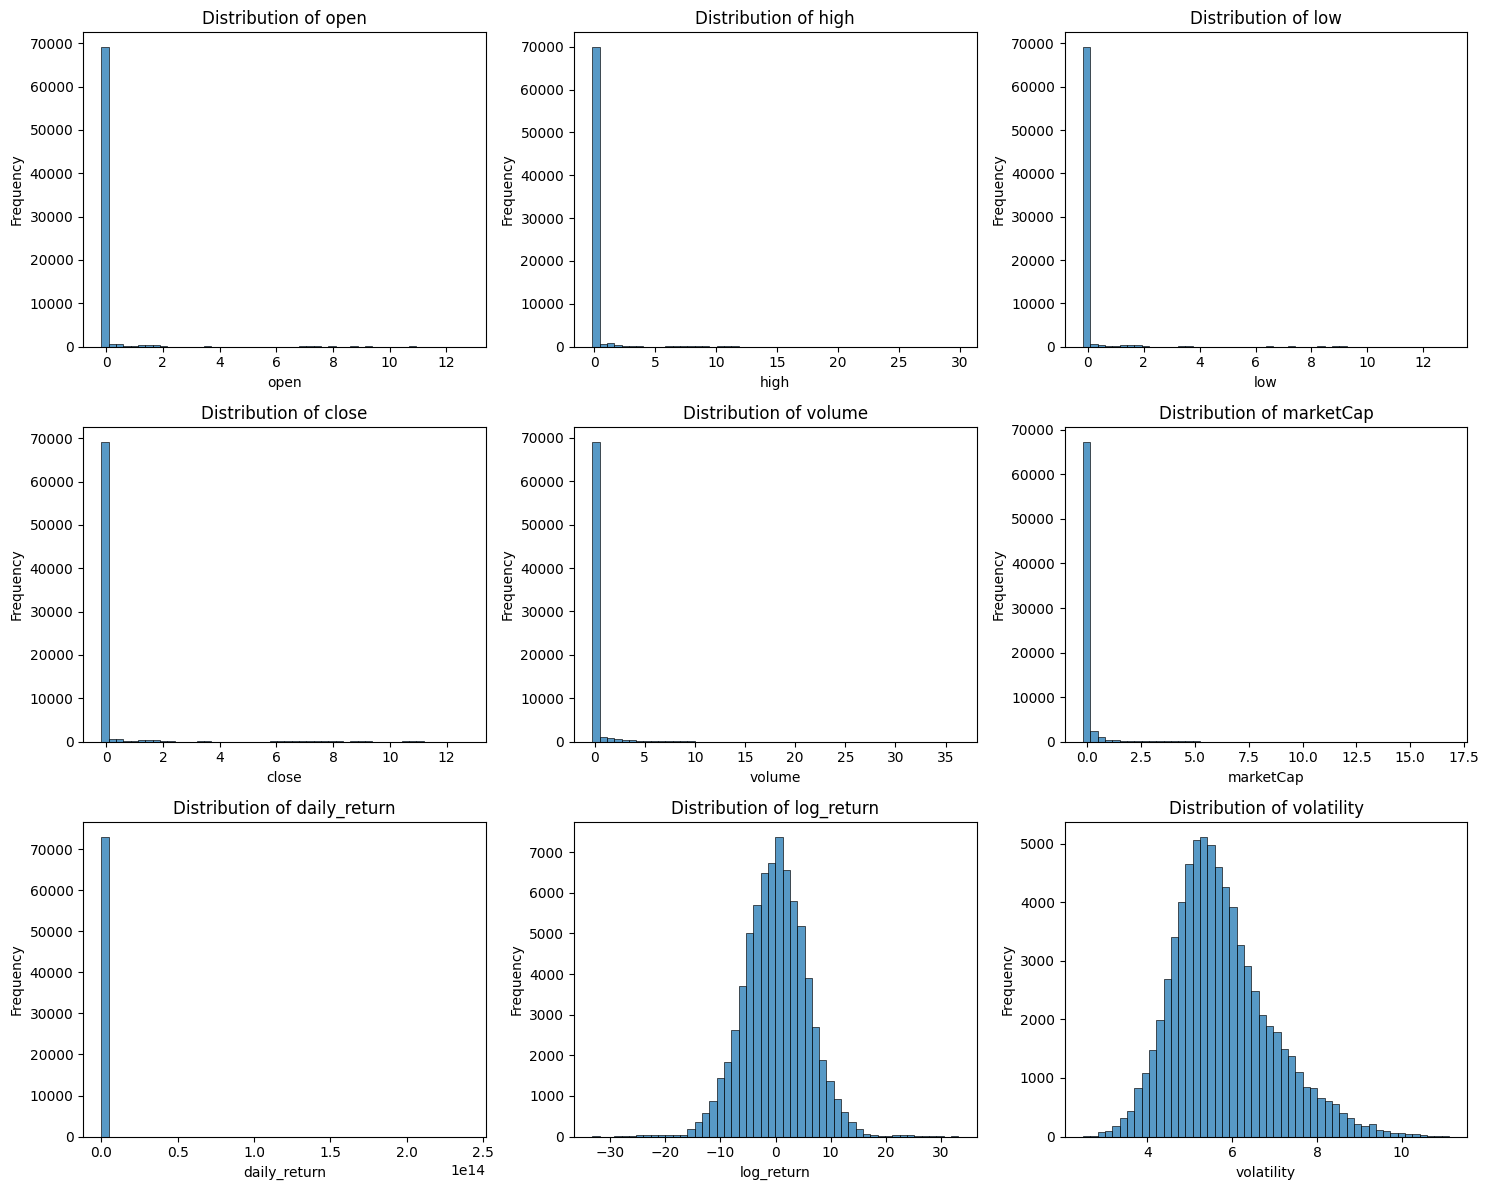

Histograms for key numerical features generated.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")


numerical_features = [
    'open',
    'high',
    'low',
    'close',
    'volume',
    'marketCap',
    'daily_return',
    'log_return',
    'volatility',
]


plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), bins=50, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histograms for key numerical features generated.")

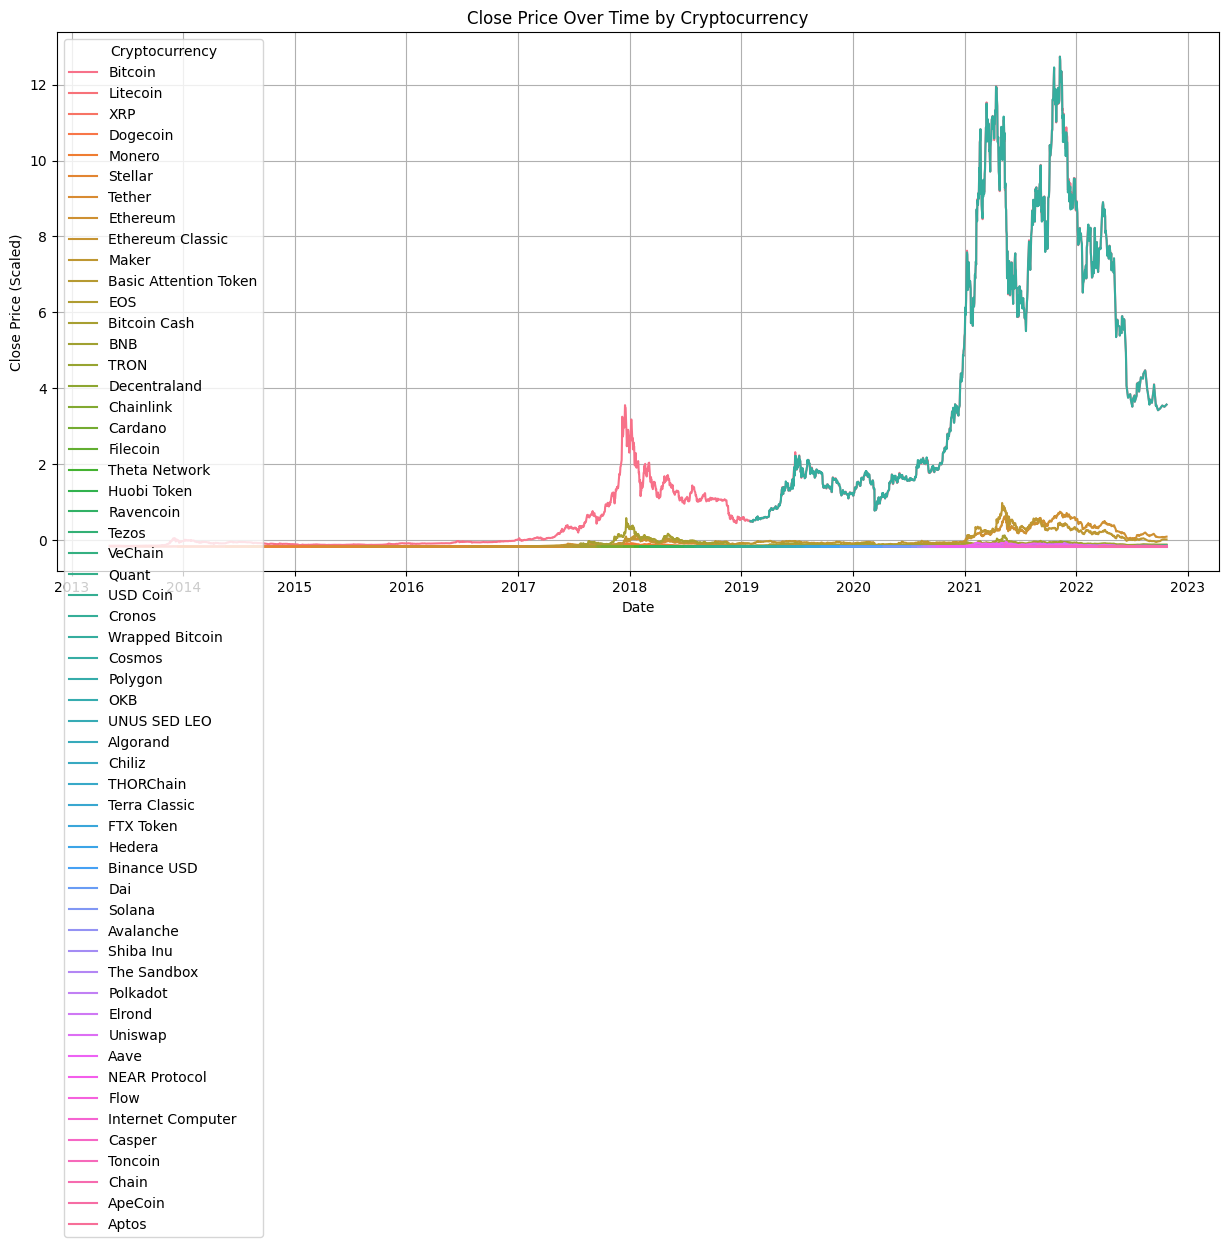

Time-series plot for 'close' price generated.


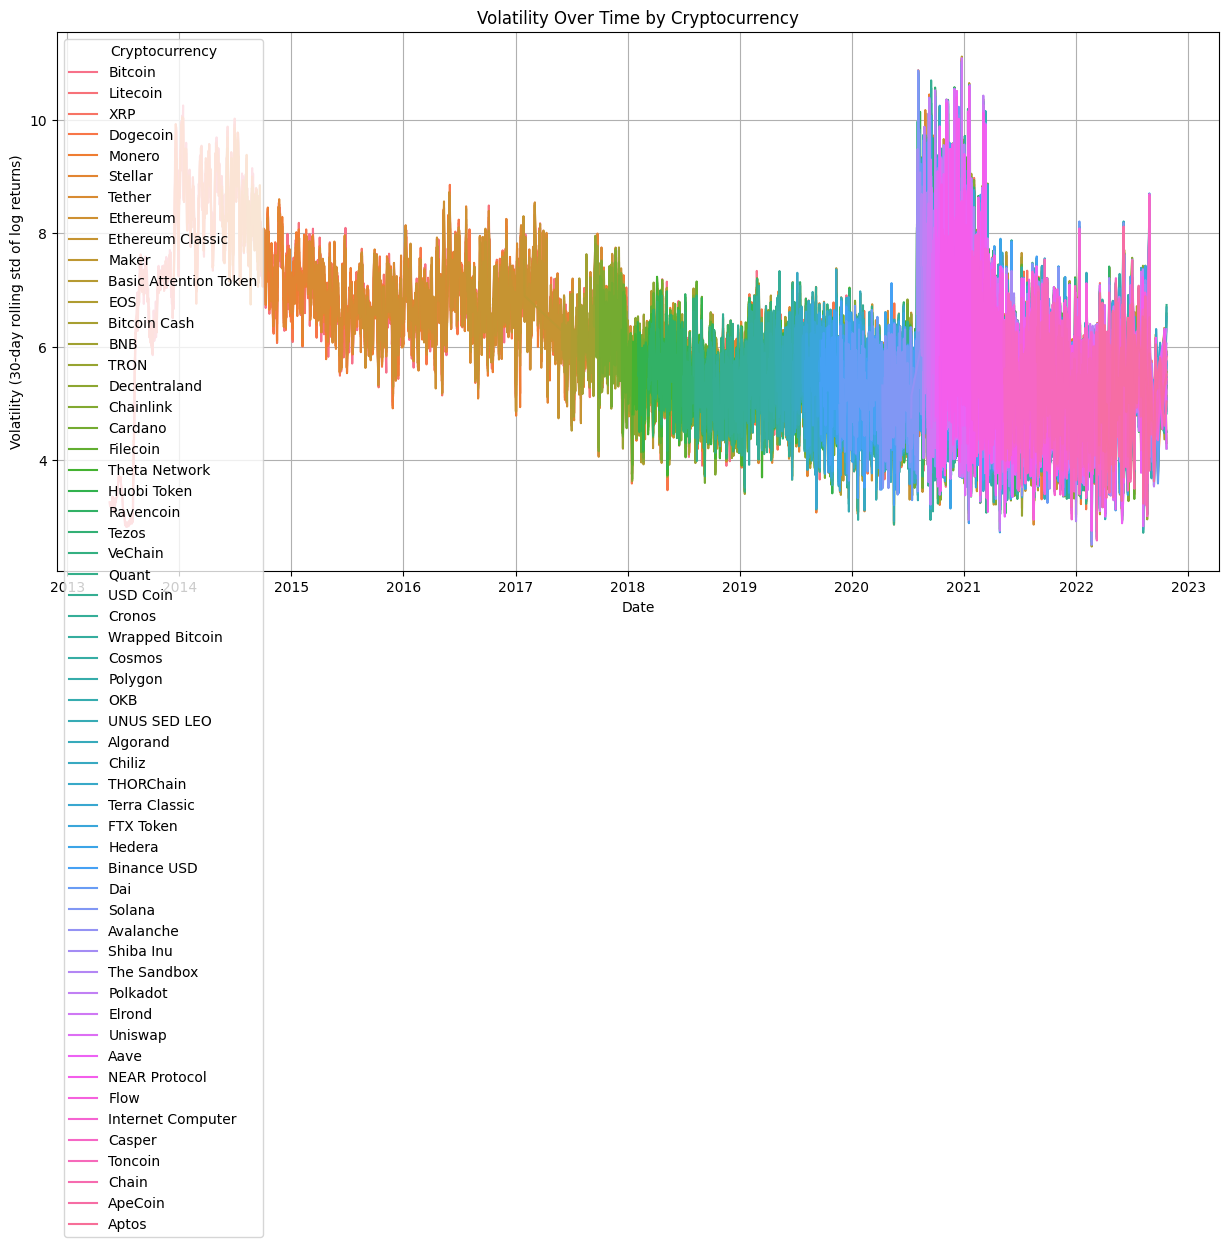

Time-series plot for 'volatility' generated.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


df_plot = df.reset_index()


plt.figure(figsize=(15, 7))
sns.lineplot(data=df_plot, x='date', y='close', hue='crypto_name')
plt.title('Close Price Over Time by Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('Close Price (Scaled)')
plt.legend(title='Cryptocurrency')
plt.grid(True)
plt.show()
print("Time-series plot for 'close' price generated.")


plt.figure(figsize=(15, 7))
sns.lineplot(data=df_plot, x='date', y='volatility', hue='crypto_name')
plt.title('Volatility Over Time by Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('Volatility (30-day rolling std of log returns)')
plt.legend(title='Cryptocurrency')
plt.grid(True)
plt.show()
print("Time-series plot for 'volatility' generated.")

Libraries imported successfully.
Correlation matrix computed successfully.


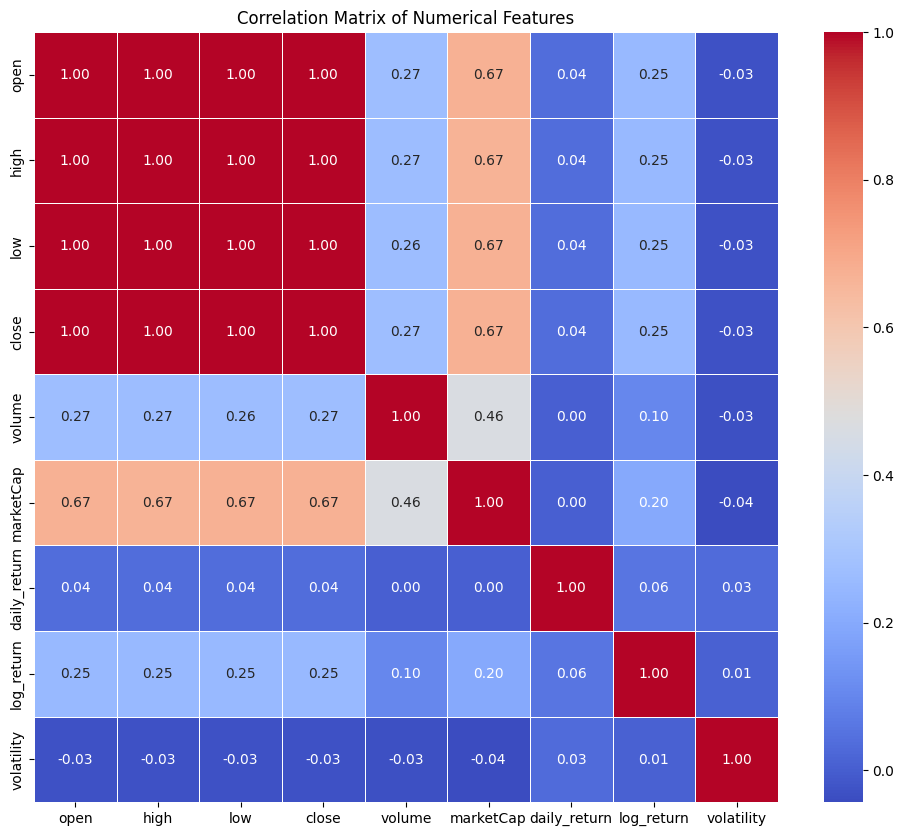

Correlation matrix heatmap generated.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")


numerical_cols_for_corr = [
    'open',
    'high',
    'low',
    'close',
    'volume',
    'marketCap',
    'daily_return',
    'log_return',
    'volatility',
]


correlation_matrix = df[numerical_cols_for_corr].corr()
print("Correlation matrix computed successfully.")


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Correlation matrix heatmap generated.")